# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan.

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models.

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`.

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
airbnbDataSet_filename = os.path.join(os.getcwd(), "airbnbListingsData.csv")
df = pd.read_csv(airbnbDataSet_filename)
df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I have chosen the Airbnb NYC listings dataset (airbnbListingsData.csv).
2. I will be predicting the nightly price of a listing, which is stored in the price column.
3. This is a supervised learning problem because we are training the model on labeled data (listings with known prices). More specifically, it is a regression problem because the label (price) is a continuous numerical value, not a category. It is not a classification problem since we're not predicting classes like “cheap” or “expensive”.
4. My initial list of features include:
- room_type
- accommodates
- bedrooms
- bathrooms
- neighbourhood_group_cleansed
- availability_365
- number_of_reviews
- review_scores_rating
- host_is_superhost
- instant_bookable

These features seem relevant to what could influence the price of a listing. I may adjust this list after doing more data pre=processing and clearning.

5. Pricing is one of the most important aspects for both hosts and guests on Airbnb. If hosts set their prices too high, they might not get bookings and if prices are too low, they might lose potential income. A model that can predict an appropriate nightly price based on listing features can help hosts make informed decisions and increase their chances of attracting guests while maximizing revenue. It could also help Airbnb recommend competitive pricing automatically.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?


3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
print ('The number of rows are:', df.shape[0])
print ('The number of columns are:', df.shape[1])
print('The name of the columns are:\n', df.columns)

The number of rows are: 28022
The number of columns are: 50
The name of the columns are:
 Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checki

In [4]:
print('The data types of the columns are:\n', df.dtypes)

The data types of the columns are:
 name                                             object
description                                      object
neighborhood_overview                            object
host_name                                        object
host_location                                    object
host_about                                       object
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                  bool
host_listings_count                               int64
host_total_listings_count                         int64
host_has_profile_pic                               bool
host_identity_verified                             bool
neighbourhood_group_cleansed                     object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms    

In [5]:
df.describe()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
count,16179.000000,16909.000000,28022.000000,28022.000000,28022.000000,28022.000000,25104.000000,26668.000000,28022.000000,28022.000000,...,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000
mean,0.906901,0.791953,14.554778,14.554778,2.874491,1.142174,1.329708,1.629556,154.228749,18.689387,...,4.814300,4.808041,4.750393,4.647670,9.581900,5.562986,3.902077,0.048283,1.758325,5.169510
std,0.227282,0.276732,120.721287,120.721287,1.860251,0.421132,0.700726,1.097104,140.816605,25.569151,...,0.438603,0.464585,0.415717,0.518023,32.227523,26.121426,17.972386,0.442459,4.446143,2.028497
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,29.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000,1.000000
25%,0.940000,0.680000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,70.000000,2.000000,...,4.810000,4.810000,4.670000,4.550000,1.000000,0.000000,0.000000,0.000000,0.130000,4.000000
50%,1.000000,0.910000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,115.000000,30.000000,...,4.960000,4.970000,4.880000,4.780000,1.000000,1.000000,0.000000,0.000000,0.510000,5.000000
75%,1.000000,1.000000,3.000000,3.000000,4.000000,1.000000,1.000000,2.000000,180.000000,30.000000,...,5.000000,5.000000,5.000000,5.000000,3.000000,1.000000,1.000000,0.000000,1.830000,7.000000
max,1.000000,1.000000,3387.000000,3387.000000,16.000000,8.000000,12.000000,21.000000,1000.000000,1250.000000,...,5.000000,5.000000,5.000000,5.000000,421.000000,308.000000,359.000000,8.000000,141.000000,13.000000


In [6]:
df['price'].unique()[:15].tolist()

[150, 75, 275, 68, 98, 89, 62, 90, 199, 299, 140, 175, 55, 82, 108]

In [7]:
nan_count = df.isnull().sum()
nan_detected = nan_count != 0
is_int_or_float = (df.dtypes == 'int64') | (df.dtypes == 'float64')
to_impute = nan_detected & is_int_or_float
df.columns[to_impute]

Index(['host_response_rate', 'host_acceptance_rate', 'bedrooms', 'beds'], dtype='object')

In [8]:
cols_to_impute = df.columns[to_impute]
for col in cols_to_impute:
    df[col + '_na'] = df[col].isnull()

In [9]:
df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications,host_response_rate_na,host_acceptance_rate_na,bedrooms_na,beds_na
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8,...,3,3,0,0,0.33,9,False,False,True,False
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1,...,1,1,0,0,4.86,6,False,False,False,False
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1,...,1,1,0,0,0.02,3,False,False,False,False
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1,...,1,0,1,0,3.68,4,False,False,False,False
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1,...,1,0,1,0,0.87,7,True,True,False,False


In [10]:
for col in cols_to_impute:
    df[col].fillna(df[col].mean(), inplace=True)

/tmp/ipython-input-3524177197.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [11]:
for colname in cols_to_impute:
    print("{} missing values count :{}".format(colname, np.sum(df[colname].isnull(), axis = 0)))

host_response_rate missing values count :0
host_acceptance_rate missing values count :0
bedrooms missing values count :0
beds missing values count :0


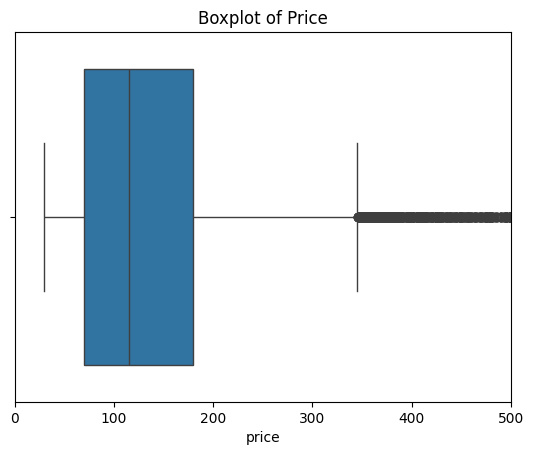

In [12]:
sns.boxplot(x=df['price'])
plt.xlim(0, 500)
plt.title("Boxplot of Price")
plt.show()

In [13]:
df['price'] = df['price'].clip(upper=500)
df['log_price'] = np.log1p(df['price'])
df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications,host_response_rate_na,host_acceptance_rate_na,bedrooms_na,beds_na,log_price
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.800000,0.170000,True,8,...,3,0,0,0.33,9,False,False,True,False,5.017280
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.090000,0.690000,True,1,...,1,0,0,4.86,6,False,False,False,False,4.330733
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.000000,0.250000,True,1,...,1,0,0,0.02,3,False,False,False,False,5.620401
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.000000,1.000000,True,1,...,0,1,0,3.68,4,False,False,False,False,4.234107
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,0.906901,0.791953,True,1,...,0,1,0,0.87,7,True,True,False,False,4.330733


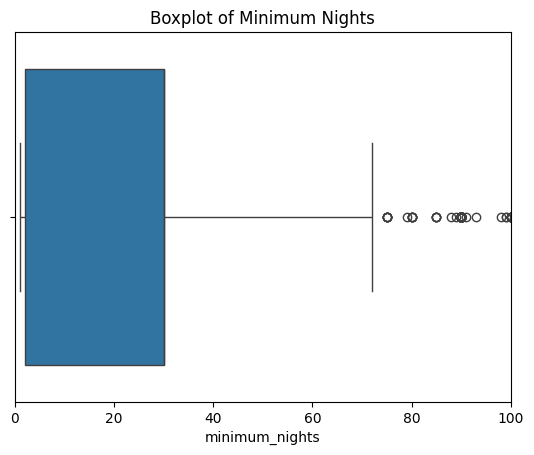

In [14]:
sns.boxplot(x=df['minimum_nights'])
plt.xlim(0, 100)
plt.title("Boxplot of Minimum Nights")
plt.show()

In [15]:
df = df[df['minimum_nights'] <= 60]

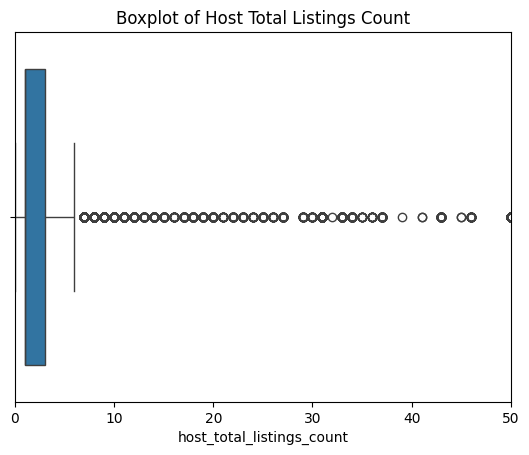

In [16]:
sns.boxplot(x=df['host_total_listings_count'])
plt.xlim(0, 50)
plt.title("Boxplot of Host Total Listings Count")
plt.show()

In [17]:
df['host_total_listings_count'] = df['host_total_listings_count'].clip(upper=50)
df['log_host_total_listings_count'] = np.log1p(df['host_total_listings_count'])
df['is_power_host'] = df['host_total_listings_count'] > 10
df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications,host_response_rate_na,host_acceptance_rate_na,bedrooms_na,beds_na,log_price,log_host_total_listings_count,is_power_host
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.800000,0.170000,True,8,...,0,0.33,9,False,False,True,False,5.017280,2.197225,False
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.090000,0.690000,True,1,...,0,4.86,6,False,False,False,False,4.330733,0.693147,False
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.000000,0.250000,True,1,...,0,0.02,3,False,False,False,False,5.620401,0.693147,False
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.000000,1.000000,True,1,...,0,3.68,4,False,False,False,False,4.234107,0.693147,False
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,0.906901,0.791953,True,1,...,0,0.87,7,True,True,False,False,4.330733,0.693147,False


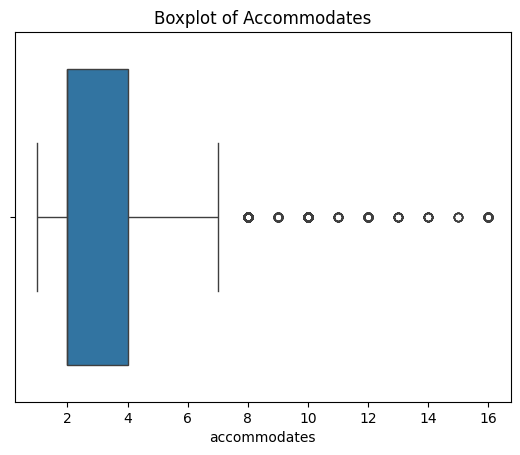

In [18]:
sns.boxplot(x=df['accommodates'])
plt.title("Boxplot of Accommodates")
plt.show()

In [19]:
df['accommodates'] = df['accommodates'].clip(upper=6)
df['log_accommodates'] = np.log1p(df['accommodates'])
df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,reviews_per_month,n_host_verifications,host_response_rate_na,host_acceptance_rate_na,bedrooms_na,beds_na,log_price,log_host_total_listings_count,is_power_host,log_accommodates
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.800000,0.170000,True,8,...,0.33,9,False,False,True,False,5.017280,2.197225,False,0.693147
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.090000,0.690000,True,1,...,4.86,6,False,False,False,False,4.330733,0.693147,False,1.386294
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.000000,0.250000,True,1,...,0.02,3,False,False,False,False,5.620401,0.693147,False,1.609438
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.000000,1.000000,True,1,...,3.68,4,False,False,False,False,4.234107,0.693147,False,1.098612
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,0.906901,0.791953,True,1,...,0.87,7,True,True,False,False,4.330733,0.693147,False,0.693147


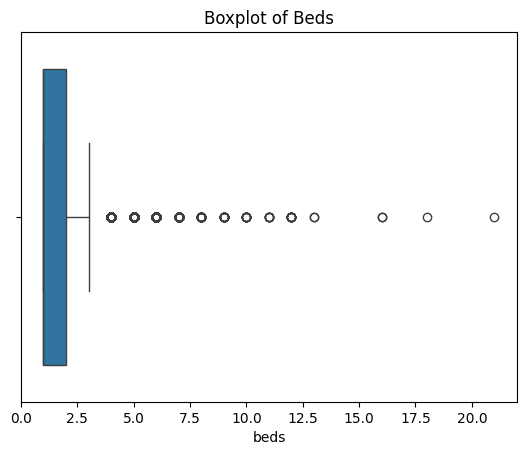

In [20]:
sns.boxplot(x=df['beds'])
plt.title("Boxplot of Beds")
plt.show()

In [21]:
df['is_large_bed_listing'] = df['beds'] > 5
df['beds'] = df['beds'].clip(upper=5)
df['log_beds'] = np.log1p(df['beds'])
df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,host_response_rate_na,host_acceptance_rate_na,bedrooms_na,beds_na,log_price,log_host_total_listings_count,is_power_host,log_accommodates,is_large_bed_listing,log_beds
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.800000,0.170000,True,8,...,False,False,True,False,5.017280,2.197225,False,0.693147,False,0.693147
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.090000,0.690000,True,1,...,False,False,False,False,4.330733,0.693147,False,1.386294,False,1.386294
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.000000,0.250000,True,1,...,False,False,False,False,5.620401,0.693147,False,1.609438,False,1.098612
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.000000,1.000000,True,1,...,False,False,False,False,4.234107,0.693147,False,1.098612,False,0.693147
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,0.906901,0.791953,True,1,...,True,True,False,False,4.330733,0.693147,False,0.693147,False,0.693147


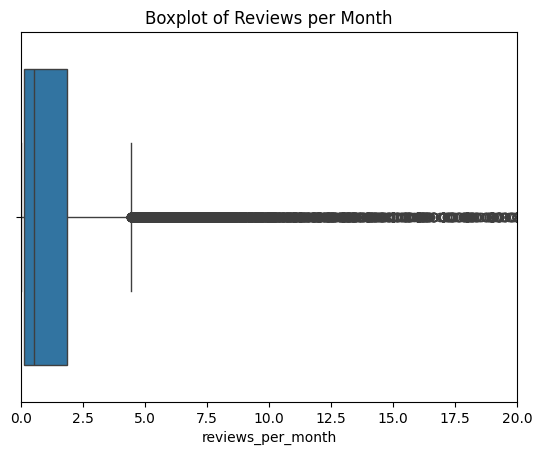

In [22]:
sns.boxplot(x=df['reviews_per_month'])
plt.xlim(0, 20)
plt.title("Boxplot of Reviews per Month")
plt.show()

In [23]:
df['reviews_per_month'] = df['reviews_per_month'].clip(upper=20)
df['log_reviews_per_month'] = np.log1p(df['reviews_per_month'])
df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,host_acceptance_rate_na,bedrooms_na,beds_na,log_price,log_host_total_listings_count,is_power_host,log_accommodates,is_large_bed_listing,log_beds,log_reviews_per_month
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.800000,0.170000,True,8,...,False,True,False,5.017280,2.197225,False,0.693147,False,0.693147,0.285179
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.090000,0.690000,True,1,...,False,False,False,4.330733,0.693147,False,1.386294,False,1.386294,1.768150
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.000000,0.250000,True,1,...,False,False,False,5.620401,0.693147,False,1.609438,False,1.098612,0.019803
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.000000,1.000000,True,1,...,False,False,False,4.234107,0.693147,False,1.098612,False,0.693147,1.543298
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,0.906901,0.791953,True,1,...,True,False,False,4.330733,0.693147,False,0.693147,False,0.693147,0.625938


In [24]:
df.columns

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',

In [25]:
df.select_dtypes(include=['object']).nunique()

,0
name,27108
description,25686
neighborhood_overview,15643
host_name,7514
host_location,1354
host_about,11824
neighbourhood_group_cleansed,5
room_type,4
amenities,24775


In [26]:
categorical_cols = [
    'neighbourhood_group_cleansed',
    'room_type'
]
for col in categorical_cols:
    print(f"Unique values in '{col}':", df[col].unique())

Unique values in 'neighbourhood_group_cleansed': ['Manhattan' 'Brooklyn' 'Queens' 'Staten Island' 'Bronx']
Unique values in 'room_type': ['Entire home/apt' 'Private room' 'Hotel room' 'Shared room']


In [27]:
df_neighbourhood = pd.get_dummies(df['neighbourhood_group_cleansed'], prefix='neighbourhood')
df.drop(columns=['neighbourhood_group_cleansed'], inplace=True)
df = pd.concat([df, df_neighbourhood], axis=1)

df_room_type = pd.get_dummies(df['room_type'], prefix='room_type')
df.drop(columns=['room_type'], inplace=True)
df = pd.concat([df, df_room_type], axis=1)

df.columns

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_

In [28]:
corr_matrix = df.corr(numeric_only=True).round(5)
corrs = corr_matrix['log_price']
corrs_sorted = corrs.sort_values(ascending=False)
pd.set_option('display.max_rows', None)
corrs_sorted

,log_price
log_price,1.00000
price,0.92886
log_accommodates,0.57381
room_type_Entire home/apt,0.56783
accommodates,0.56279
bedrooms,0.44084
log_beds,0.42727
beds,0.41927
neighbourhood_Manhattan,0.30332
bathrooms,0.18713


In [29]:
df.rename(columns={
    'has_availability': 'availability',
    'is_large_bed_listing': 'large_bed'
}, inplace=True)

selected_features = [
    'log_accommodates', 'bedrooms', 'log_beds',
    'bathrooms', 'availability_30', 'availability_60', 'availability_90',
    'review_scores_location', 'review_scores_cleanliness', 'review_scores_rating',
    'log_reviews_per_month', 'large_bed', 'availability'
]

selected_features += [col for col in df.columns if col.startswith('room_type_')]

selected_features += [col for col in df.columns if col.startswith('neighbourhood_')]

selected_features

['log_accommodates',
 'bedrooms',
 'log_beds',
 'bathrooms',
 'availability_30',
 'availability_60',
 'availability_90',
 'review_scores_location',
 'review_scores_cleanliness',
 'review_scores_rating',
 'log_reviews_per_month',
 'large_bed',
 'availability',
 'room_type_Entire home/apt',
 'room_type_Hotel room',
 'room_type_Private room',
 'room_type_Shared room',
 'neighbourhood_Bronx',
 'neighbourhood_Brooklyn',
 'neighbourhood_Manhattan',
 'neighbourhood_Queens',
 'neighbourhood_Staten Island']

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data?
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data.

<Double click this Markdown cell to make it editable, and record your answers here.>

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

<b>Task:</b> Use the rest of this notebook to carry out your project plan.

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [31]:
y = df['log_price']
X = df[selected_features]

print("Number of examples: " + str(X.shape[0]))
print("\nNumber of Features:" + str(X.shape[1]))
print(str(list(X.columns)))

Number of examples: 27737

Number of Features:22
['log_accommodates', 'bedrooms', 'log_beds', 'bathrooms', 'availability_30', 'availability_60', 'availability_90', 'review_scores_location', 'review_scores_cleanliness', 'review_scores_rating', 'log_reviews_per_month', 'large_bed', 'availability', 'room_type_Entire home/apt', 'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room', 'neighbourhood_Bronx', 'neighbourhood_Brooklyn', 'neighbourhood_Manhattan', 'neighbourhood_Queens', 'neighbourhood_Staten Island']


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)

In [34]:
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_y_pred))
lr_r2 = r2_score(y_test, lr_y_pred)

print(f"[Linear Regression] TEST RMSE: {lr_rmse:.4f}")
print(f"[Linear Regression] TEST R2:   {lr_r2:.4f}")

[Linear Regression] TEST RMSE: 0.4295
[Linear Regression] TEST R2:   0.5777


In [35]:
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
}

In [36]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(
    rf,
    param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

print("Starting RF GridSearchCV…")
grid_search.fit(X_train, y_train)
print("Grid search done.")

Starting RF GridSearchCV…
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Grid search done.


In [37]:
best_params = grid_search.best_params_
print("Best RF parameters found:", best_params)

Best RF parameters found: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 300}


In [38]:
rf_model = RandomForestRegressor(n_estimators=300, max_depth=10 , min_samples_split=5)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
rf_r2 = r2_score(y_test, rf_y_pred)

print(f"[Random Forest] TEST RMSE: {rf_rmse:.4f}")
print(f"[Random Forest] TEST R2:   {rf_r2:.4f}")

[Random Forest] TEST RMSE: 0.3968
[Random Forest] TEST R2:   0.6395
